# Quick Start (oda api v1.1.15-dev0)

In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
#%matplotlib notebook


## Connection to the dispatcher 

### build the dispatcher object

In [2]:
disp=DispatcherAPI(host='www.astro.unige.ch/cdci/astrooda/dispatch-data',instrument='mock',protocol='https')

In [3]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

isgri
jemx
polar
spi_acs


### get the description of the instrument

In [4]:
disp.get_instrument_description('isgri')


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isg

### get the description of the product


In [5]:
disp.get_product_description(instrument='isgri',product_name='isgri_image')

--------------
parameters for  product isgri_image and instrument isgri

--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image

### check query before submission
we pass 'dry_run' to check if the request is correct without actually submitting it

In [6]:
data_collection=disp.get_product(instrument='isgri',
                                 product='isgri_image',
                                 T1='2003-03-15T23:27:40.0',
                                 T2='2003-03-16T00:03:12.0',
                                 osa_version='OSA10.2',
                                 RA='a',
                                 DEC=-37.844167,
                                 detection_threshold=5.0,
                                 radius=15.,
                                 product_type='Real',
                                 dry_run=True)

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T23:27:40.0
T2 2003-03-16T00:03:12.0
osa_version OSA10.2
RA a
DEC -37.844167
detection_threshold 5.0
radius 15.0
instrument isgri
product_type isgri_image
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id 6BBRP68TSYF0SBFR
dry_run (True,)
api True
oda_api_version 1.1.15-dev0


query failed!
Remote server message:-> failed: setting form parameters
Remote server error_message-> ValueError(u"Invalid character at col 0 in angle u'a'",)
Remote server debug_message-> 


SystemExit: RemoteException (line 54): Remote analysis exception

/Users/orion/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Get ODA products
now we skip the dry_run to actually get the products

In [8]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:15.0',
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=257.815417,
                      DEC=-41.593417,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T23:27:40.0
T2 2003-03-16T00:03:15.0
E1_keV 20.0
E2_keV 40.0
osa_version OSA10.2
RA 257.815417
DEC -41.593417
detection_threshold 5.0
radius 15.0
instrument isgri
product_type isgri_image
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id MW8JICUUZVN28DF7
dry_run (False,)
api True
oda_api_version 1.1.15-dev0


query done succesfully!


### the ODA data structure

In [9]:
data_collection.show()

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'src_name': '', 'instrument': 'isgri', 'product': 'mosaic', 'query_parameters': '[{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"units": "sigma", "name": "detection_threshold", "value": "5.0"}, {"units": null, "name": "image_scale_min", "value": null}, {"units": null, "name": "image_scale_max", "value": null}]'}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



you can acess memeber by name:

In [10]:
data_collection.mosaic_image_0_mosaic

or by position in the data list

In [12]:
data_collection._p_list[0]

### the ODA catalog

In [13]:
data_collection.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str12,float64,float64,float64,int64,int64,int64,float64
67,OAO 1657-415,18.9650936126709,255.1972198486328,-41.653160095214844,-32768,2,0,0.00014000000373926014
73,4U 1700-377,22.8853702545166,255.97720336914062,-37.83725357055664,-32768,2,0,0.0002800000074785203
76,GX 349+2,14.08207893371582,256.4292297363281,-36.415679931640625,-32768,2,0,0.0002800000074785203
128,GX 354-0,9.371565818786621,262.9886169433594,-33.828392028808594,-32768,2,0,0.0002800000074785203


you can use astropy.table commands to modify the table of the catatlog http://docs.astropy.org/en/stable/table/modify_table.html

to generate a catalog to pass to the dispatcher api

In [14]:
api_cat=data_collection.dispatcher_catalog_1.get_api_dictionary()

In [15]:
api_cat

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[67, 73, 76, 128], ["OAO 1657-415", "4U 1700-377", "GX 349+2", "GX 354-0"], [18.9650936126709, 22.8853702545166, 14.08207893371582, 9.371565818786621], [255.1972198486328, 255.97720336914062, 256.4292297363281, 262.9886169433594], [-41.653160095214844, -37.83725357055664, -36.415679931640625, -33.828392028808594], [-32768, -32768, -32768, -32768], [2, 2, 2, 2], [0, 0, 0, 0], [0.00014000000373926014, 0.0002800000074785203, 0.0002800000074785203, 0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U12"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "<f8"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

In [16]:
data_collection=disp.get_product(instrument='isgri',
                              product='isgri_image',
                              T1='2003-03-15T23:27:40.0',
                              T2='2003-03-16T00:03:15.0',
                              E1_keV=20.0,
                              E2_keV=40.0,
                              osa_version='OSA10.2',
                              RA=255.986542,
                              DEC=-37.844167,
                              detection_threshold=5.0,
                              radius=15.,
                              product_type='Real',
                              selected_catalog=api_cat)

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T23:27:40.0
T2 2003-03-16T00:03:15.0
E1_keV 20.0
E2_keV 40.0
osa_version OSA10.2
RA 255.986542
DEC -37.844167
detection_threshold 5.0
radius 15.0
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[67, 73, 76, 128], ["OAO 1657-415", "4U 1700-377", "GX 349+2", "GX 354-0"], [18.9650936126709, 22.8853702545166, 14.08207893371582, 9.371565818786621], [255.1972198486328, 255.97720336914062, 256.4292297363281, 262.9886169433594], [-41.653160095214844, -37.83725357055664, -36.415679931640625, -33.828392028808594], [-32768, -32768, -32768, -32768], [2, 2, 2, 2], [0, 0, 0, 0], [0.00014000000373926014, 0.0002800000074785203, 0.0002800000074785203, 0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_nam

you can explore the image with the following command

In [17]:
data_collection.mosaic_image_0_mosaic.show()

------------------------------
name: mosaic_image
meta_data dict_keys(['src_name', 'instrument', 'product', 'query_parameters'])
number of data units 2
------------------------------
data uniti 0 ,name: Primary
data uniti 1 ,name: ISGR-MOSA-IMA


In [18]:
data_collection.mosaic_image_0_mosaic.show_meta()

------------------------------
src_name : 
instrument : isgri
product : mosaic
query_parameters : [{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"units": "sigma", "name": "detection_threshold", "value": "5.0"}, {"units": null, "name": "image_scale_min", "value": null}, {"units": null, "name": "image_scale_max", "value": null}]
------------------------------


In [19]:
data_collection.mosaic_image_0_mosaic.data_unit[1].data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
hdu=data_collection.mosaic_image_0_mosaic.to_fits_hdu_list()

In [23]:
data_collection.mosaic_image_0_mosaic.data_unit[1].data.shape

(455, 455)

In [24]:
data_collection.mosaic_image_0_mosaic.write_fits_file('test.fits',overwrite=True)

### the ODA Image   plotting tool

In [25]:
#interactive
#%matplotlib notebook

%matplotlib inline
im=OdaImage(data_collection.mosaic_image_0_mosaic)

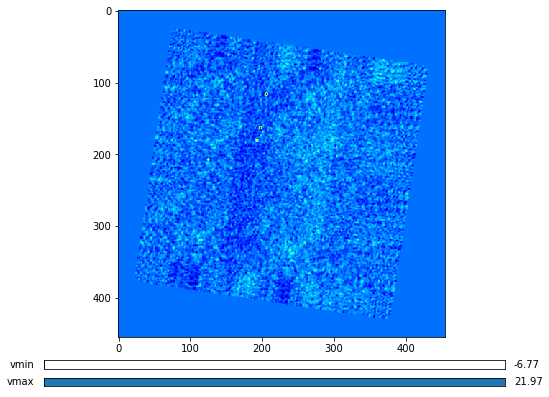

In [26]:
im.show(unit_ID=1)

In [27]:
data_collection.mosaic_image_0_mosaic.data_unit[1].header

{'BASETYPE': 'DAL_ARRAY',
 'BITPIX': -32,
 'BSCALE': 1,
 'BUNIT': 'no units',
 'BZERO': 0,
 'CD1_1': -0.0822862539155913,
 'CD1_2': 0.0,
 'CD2_1': 0.0,
 'CD2_2': 0.0822862539155913,
 'CHANMAX': 40,
 'CHANMIN': 20,
 'CHANTYPE': 'PI',
 'CHECKSUM': 'oVP0oTP0oTP0oTP0',
 'COMMENT': 'STAMP :',
 'CONFIGUR': 'latest_osa_sw_2015-11-10T03:50:02',
 'CREATOR': 'ii_skyimage 5.4.4',
 'CRPIX1': 228.0,
 'CRPIX2': 228.0,
 'CRVAL1': 252.939376831055,
 'CRVAL2': -32.649772644043,
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'DATASUM': '2370916866',
 'DATE': '2019-09-11T09:14:22',
 'DATE-END': '2003-03-15T23:57:39',
 'DATE-OBS': '2003-03-15T23:27:53',
 'DEADC': 0.775885283090927,
 'DETNAM': 'ISGRI',
 'EQUINOX': 2000.0,
 'EXTNAME': 'ISGR-MOSA-IMA',
 'EXTREL': '7.4',
 'EXTVER': 3,
 'E_MAX': 40.0,
 'E_MEAN': 30.0,
 'E_MIN': 20.0,
 'GCOUNT': 1,
 'GRPID1': 1,
 'HDUCLAS1': 'IMAGE',
 'HDUCLASS': 'OGIP',
 'HDUDOC': 'ISDC-IBIS ICD',
 'HDUVERS': '1.1.0',
 'IMATYPE': 'SIGNIFICAN

### the ODA LC  plotting tool

In [28]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=70,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      radius=15.,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T23:27:40.0
T2 2003-03-16T00:03:12.0
time_bin 70
osa_version OSA10.2
RA 255.986542
DEC -37.844167
radius 15.0
instrument isgri
product_type isgri_lc
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id 9VLSUGRTNT9PB5GC
dry_run (False,)
api True
oda_api_version 1.1.15-dev0


query done succesfully!


### explore LC

In [8]:
data_collection.show()

0 isgri_lc_0_GX349+2
 meta data {'src_name': 'GX 349+2', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}

1 isgri_lc_1_IGRJ17285-2922
 meta data {'src_name': 'IGR J17285-2922', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}

2 isgri_lc_2_AXJ1700.2-4220
 meta data {'src_name': 'AX J1700.2-4220', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}

3 isgri_lc_3_IGRJ17507-2856
 meta data {'src_name': 'IGR J17507-2856', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}

4 isgri_lc_4_IGRJ17508-3219
 meta data {'src_name': 'IGR J17508-3219', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}

5 isgri_lc_5_IGRJ17586-2129
 meta data {'src_name': 'IGR J17586-2129', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}

6 isgri_lc_6_OAO1657-415
 meta data {'src_name': 'OAO 1657-4

In [30]:
data_collection.isgri_lc_0_GX349p2.show()

------------------------------
name: isgri_lc
meta_data dict_keys(['src_name', 'rate', 'time_bin', 'rate_err', 'time'])
number of data units 2
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: ISGR-SRC.-LCR


In [31]:
for ID,s in enumerate(data_collection._p_list):
    print (ID,s.meta_data['src_name'])

0 GX 349+2
1 IGR J17285-2922
2 AX J1700.2-4220
3 IGR J17507-2856
4 IGR J17508-3219
5 IGR J17586-2129
6 OAO 1657-415
7 GRO J1719-24
8 4U 1735-444
9 IGR J17326-3445
10 4U 1722-30
11 IGR J17099-2418
12 NEW_6
13 NEW_4
14 NEW_5
15 NEW_2
16 NEW_3
17 NEW_1
18 IGR J16248-4603
19 IGR J17091-3624
20 IGR J17191-2821
21 IGR J17103-3341
22 GRS 1747-312
23 GX 354-0
24 IGR J17314-2854
25 GX 1+4
26 H 1705-440
27 1RXS J174607.8-21333
28 4U 1700-377
29 1E 1740.7-2942


In [32]:
lc=data_collection._p_list[0]
lc.data_unit[1].data

array([(1169.97924981, 198.35461, 437.45297 , 2.560371 , 16.756752 , 6.457998 , 0.9999995),
       (1169.98006   , 193.66727, 126.646324, 2.4612792, 26.851568 , 6.381221 , 0.9999995),
       (1169.98087017, 165.48798, 106.67175 , 2.2341907, 30.112095 , 5.7995043, 0.9999995),
       (1169.98168037, 170.36319, 110.04073 , 2.2748673, 24.547153 , 5.9050727, 0.9999995),
       (1169.98249057, 179.08556, 114.907425, 2.319844 , 19.534487 , 6.0552273, 0.9999995),
       (1169.98330074, 170.404  , 113.80614 , 2.2976866, 35.34908  , 5.917109 , 0.9999995),
       (1169.98411092, 177.87416, 112.59515 , 2.3153915, 46.75426  , 6.0594788, 0.9999995),
       (1169.98492112, 170.02942, 107.77012 , 2.3239565, 44.09943  , 5.904361 , 0.9999995),
       (1169.9857313 , 169.3733 , 108.96758 , 2.294586 , 38.917126 , 5.8867855, 0.9999995),
       (1169.98654149, 164.62074, 105.818214, 2.196995 , 41.819798 , 5.79285  , 0.9999995),
       (1169.98735168, 160.1174 , 100.87292 , 2.2091596, 19.254423 , 5.7093225, 

In [33]:
lc.show()

------------------------------
name: isgri_lc
meta_data dict_keys(['src_name', 'rate', 'time_bin', 'rate_err', 'time'])
number of data units 2
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: ISGR-SRC.-LCR


In [34]:
lc.meta_data

{'src_name': 'GX 349+2',
 'rate': 'RATE',
 'time_bin': 0.000810143479094966,
 'rate_err': 'ERROR',
 'time': 'TIME'}

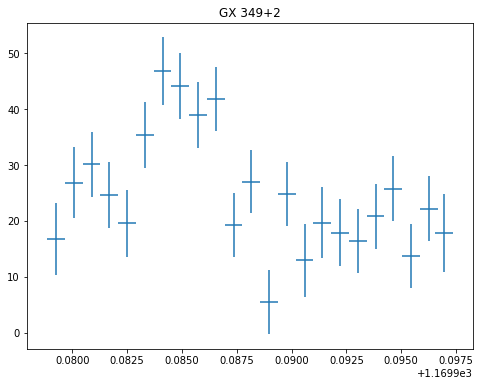

In [35]:
%matplotlib inline
OdaLightCurve(lc).show(unit_ID=1)

In [36]:
lc.data_unit[0].header

{'BITPIX': 8,
 'DEC': '-37.844167',
 'EXTEND': True,
 'NAXIS': 0,
 'RA': '255.986542',
 'SIMPLE': True,
 'T1': '2003-03-15T23:27:40.0',
 'T2': '2003-03-16T00:03:12.0',
 'api': 'True',
 'dry_run': 'False',
 'instrument': 'isgri',
 'oda_api_version': '1.1.15-dev0',
 'off_line': 'False',
 'osa_version': 'OSA10.2',
 'product_type': 'isgri_lc',
 'query_status': 'new',
 'query_type': 'Real',
 'radius': '15.0',
 'session_id': '9VLSUGRTNT9PB5GC',
 'time_bin': '70',
 'url': 'http://www.astro.unige.ch/cdci/astrooda_?product_type=isgri_lc&verbose=False&dry_run=False&osa_version=OSA10.2&T2=2003-03-16T00%3A03%3A12.0&time_bin=70&session_id=9VLSUGRTNT9PB5GC&T1=2003-03-15T23%3A27%3A40.0&instrument=isgri&api=True&radius=15.0&RA=255.986542&query_type=Real&off_line=False&DEC=-37.844167&query_status=new&oda_api_version=1.1.15-dev0',
 'verbose': 'False'}

### Polar LC

In [37]:
data_collection=disp.get_product(instrument='polar',product='polar_lc',T1='2016-12-18T08:32:21.000',T2='2016-12-18T08:34:01.000',time_bin=0.5,verbose=True,dry_run=False)

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2016-12-18T08:32:21.000
T2 2016-12-18T08:34:01.000
time_bin 0.5
instrument polar
product_type polar_lc
query_type Real
off_line (False,)
query_status ('new',)
verbose (True,)
session_id 66B1J0ZNB23TSSWM
dry_run (False,)
api True
oda_api_version 1.1.15-dev0


query done succesfully!


In [38]:
data_collection.show()

ID=0 prod_name=polar_lc_0_lc  meta_data: {'src_name': 'lc', 'rate': 'rate', 'time_bin': 0.5, 'rate_err': 'rate_err', 'time': 'time'}

ID=1 prod_name=polar_lc_1  meta_data: 



In [39]:
data_collection._p_list[0].meta_data

{'src_name': 'lc',
 'rate': 'rate',
 'time_bin': 0.5,
 'rate_err': 'rate_err',
 'time': 'time'}

In [40]:
lc=data_collection._p_list[0]
root=data_collection._p_list[1]
open('lc.root', "wb").write(root)

5022

In [41]:
 open('lc.root', "wb").write(root)

5022

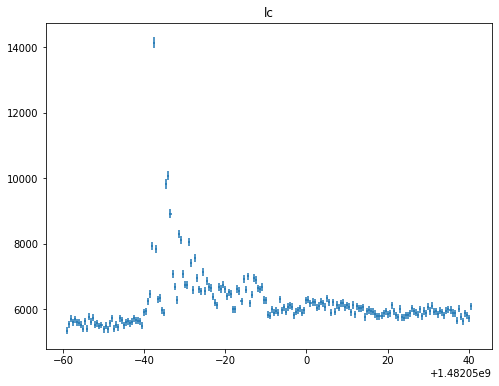

In [42]:
%matplotlib inline
OdaLightCurve(lc).show(unit_ID=1)

### SPIACS LC

In [43]:
disp.get_instrument_description('spi_acs')


--------------
instrumet: spi_acs

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: spiacs_parameters
 name: user_catalog,  value: None,  units: str, 
 name: [],  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 

--------------
query_name: spi_acs_lc_query
 product_name: spi_acs_lc
 name: time_bin,  value: 1000.0,  units: sec, 


In [44]:
data_collection=disp.get_product(instrument='spi_acs',
                      product='spi_acs_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-15T23:57:12.0',
                      time_bin=2,
                      RA=255.986542,
                      DEC=-37.844167,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T23:27:40.0
T2 2003-03-15T23:57:12.0
time_bin 2
RA 255.986542
DEC -37.844167
instrument spi_acs
product_type spi_acs_lc
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id 2WSIOJ26BO2XQX2F
dry_run (False,)
api True
oda_api_version 1.1.15-dev0


query done succesfully!


In [45]:
data_collection.show()

ID=0 prod_name=spi_acs_lc_0_query  meta_data: {'src_name': 'query', 'rate': 'RATE', 'time_bin': 2.0, 'rate_err': 'ERROR', 'time': 'TIME'}



In [46]:
lc=data_collection._p_list[0]


In [47]:
lc.meta_data

{'src_name': 'query',
 'rate': 'RATE',
 'time_bin': 2.0,
 'rate_err': 'ERROR',
 'time': 'TIME'}

In [48]:
lc.show()

------------------------------
name: 
meta_data dict_keys(['src_name', 'rate', 'time_bin', 'rate_err', 'time'])
number of data units 2
------------------------------
data uniti 0 ,name: Primary
data uniti 1 ,name: RATE


In [49]:
lc.data_unit[1].header

{'BITPIX': 8,
 'DATE-END': '2003-03-15T23:27:40.007',
 'DATE-OBS': '2003-03-15T23:27:40.007',
 'EXTNAME': 'RATE',
 'GCOUNT': 1,
 'INSTRUME': 'SPIACS',
 'MJDREF': 51544.0,
 'NAXIS': 2,
 'NAXIS1': 24,
 'NAXIS2': 886,
 'ONTIME': 1772.0,
 'PCOUNT': 0,
 'TASSIGN': 'SATELLITE',
 'TELESCOP': 'INTEGRAL',
 'TFIELDS': 3,
 'TFORM1': 'D',
 'TFORM2': 'D',
 'TFORM3': 'D',
 'TIMEDEL': 2.0,
 'TIMEREF': 'LOCAL',
 'TIMESYS': 'TT',
 'TIMEUNIT': 's',
 'TIMEZERO': 101086946.00000004,
 'TSTART': 101086060.00700004,
 'TSTOP': 101087832.00700004,
 'TTYPE1': 'TIME',
 'TTYPE2': 'RATE',
 'TTYPE3': 'ERROR',
 'XTENSION': 'BINTABLE'}

In [50]:
lc.data_unit[1].data[0:10]

array([(-885.018, 75779. , 194.65225403),
       (-883.018, 75484. , 194.27300379),
       (-881.018, 76190. , 195.17940465),
       (-879.018, 75694.5, 194.54369689),
       (-877.018, 75322. , 194.06442229),
       (-875.018, 76017.5, 194.95832888),
       (-873.018, 75529. , 194.33090336),
       (-871.018, 75815. , 194.69848484),
       (-869.018, 76324. , 195.35096621),
       (-867.018, 75448.5, 194.22731528)],
      dtype=[('TIME', '<f8'), ('RATE', '<f8'), ('ERROR', '<f8')])

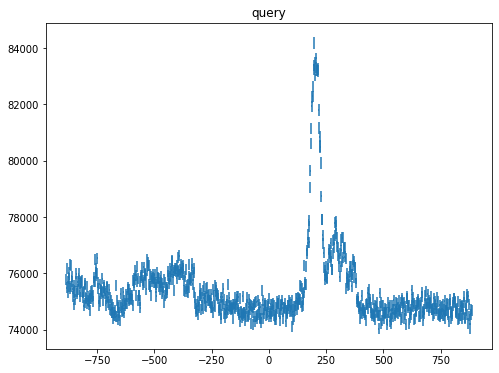

In [51]:
OdaLightCurve(lc).show(unit_ID=1)

### the ODA  and spectra

In [52]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_spectrum',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      radius=15.,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T23:27:40.0
T2 2003-03-16T00:03:12.0
osa_version OSA10.2
RA 255.986542
DEC -37.844167
radius 15.0
instrument isgri
product_type isgri_spectrum
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id 2EL2CM3PYEFCY3XQ
dry_run (False,)
api True
oda_api_version 1.1.15-dev0


query done succesfully!


### explore spectra

In [53]:
data_collection.show()

ID=0 prod_name=isgri_spectrum_0_GX349+2_isgri_spectrum  meta_data: {'src_name': 'GX 349+2', 'product': 'isgri_spectrum'}

ID=1 prod_name=isgri_spectrum_1_GX349+2_isgri_arf  meta_data: {'src_name': 'GX 349+2', 'product': 'isgri_arf'}

ID=2 prod_name=isgri_spectrum_2_GX349+2_isgri_rmf  meta_data: {'src_name': 'GX 349+2', 'product': 'isgri_rmf'}

ID=3 prod_name=isgri_spectrum_3_IGRJ17285-2922_isgri_spectrum  meta_data: {'src_name': 'IGR J17285-2922', 'product': 'isgri_spectrum'}

ID=4 prod_name=isgri_spectrum_4_IGRJ17285-2922_isgri_arf  meta_data: {'src_name': 'IGR J17285-2922', 'product': 'isgri_arf'}

ID=5 prod_name=isgri_spectrum_5_IGRJ17285-2922_isgri_rmf  meta_data: {'src_name': 'IGR J17285-2922', 'product': 'isgri_rmf'}

ID=6 prod_name=isgri_spectrum_6_AXJ1700.2-4220_isgri_spectrum  meta_data: {'src_name': 'AX J1700.2-4220', 'product': 'isgri_spectrum'}

ID=7 prod_name=isgri_spectrum_7_AXJ1700.2-4220_isgri_arf  meta_data: {'src_name': 'AX J1700.2-4220', 'product': 'isgri_arf'}

ID=8

In [55]:
d=data_collection._p_list[0]

In [56]:
d.meta_data

{'src_name': 'GX 349+2', 'product': 'isgri_spectrum'}

we can select all the products for the same soruce name and build a new data collection on-the-fly with a single instruction

In [57]:
data_sel=data_collection.new_from_metadata('src_name','4U 1700-377')


In [58]:
data_sel.show()


ID=0 prod_name=prod_0_4U1700-377_isgri_spectrum  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_spectrum'}

ID=1 prod_name=prod_1_4U1700-377_isgri_arf  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_arf'}

ID=2 prod_name=prod_2_4U1700-377_isgri_rmf  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_rmf'}



and we can save all these products 

In [59]:
data_sel.save_all_data()

In [61]:
d=data_collection._p_list[3]

In [62]:
d.data_unit[1].header

{'ANCRFILE': 'NONE',
 'AREASCAL': 1,
 'BACKFILE': 'NONE',
 'BACKSCAL': 1,
 'BASETYPE': 'DAL_TABLE',
 'BITPIX': 8,
 'BKGPARAM': 'rebinned_back_spe.fits',
 'CHANTYPE': 'PI',
 'CHECKSUM': 'nKYEqJYCnJYCnJYC',
 'COMMENT': '  on the next keyword which has the name CONTINUE.',
 'CONFIGUR': 'latest_osa_sw_2015-11-10T03:50:02',
 'CORRFILE': 'NONE',
 'CORRSCAL': 0,
 'CREATOR': 'ISGRISpectraSum.v5.4.2.extractall',
 'DATASUM': '3507849637',
 'DATE': '2019-09-11T12:33:43.097595',
 'DEADC': 0.775885283090927,
 'DEC_OBJ': -29.3624725341797,
 'DETCHANS': 62,
 'DETNAM': 'ISGRI',
 'EQUINOX': 2000.0,
 'EXPOSURE': 1198.97207125461,
 'EXP_SRC': 417.510009765625,
 'EXTNAME': 'ISGR-EVTS-SPE',
 'EXTREL': '10.4',
 'EXTVER': 13,
 'FILTER': 'none',
 'FITTYPE': 6,
 'GCOUNT': 1,
 'GRPID1': 1,
 'HDUCLAS1': 'SPECTRUM',
 'HDUCLAS2': 'TOTAL',
 'HDUCLAS3': 'RATE',
 'HDUCLASS': 'OGIP',
 'HDUVERS': '1.2.1',
 'INSTRUME': 'IBIS',
 'ISDCLEVL': 'SPE',
 'LONGSTRN': 'OGIP 1.0',
 'MJDREF': 51544.0,
 'NAME': 'IGR J17285-2922',
 

### JEM-X test

In [63]:
disp.get_instrument_description('jemx')


--------------
instrumet: jemx

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: jemx_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: jemx_num,  value: 2,  units: None, 
 name: E1_keV,  value: 3.0,  units: keV, 
 name: E2_keV,  value: 35.0,  units: keV, 

--------------
query_name: jemx_image_query
 product_name: jemx_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: 

In [69]:
data_collection=disp.get_product(instrument='jemx',
                      jemx_num='2',
                      product='jemx_lc',
                      scw_list=['010200230010.001'],
                      osa_version='OSA10.2',
                      radius=15.,
                      product_type='Real')

['010200230010.001']
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
jemx_num 2
scw_list ['010200230010.001']
osa_version OSA10.2
radius 15.0
instrument jemx
product_type jemx_lc
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id BMR4DAJFZCSZS0QP
dry_run (False,)
api True
oda_api_version 1.1.15-dev0


query done succesfully!


In [70]:
data_collection.show()

ID=0 prod_name=jemx_lc_0_Crab  meta_data: {'src_name': 'Crab', 'rate': 'RATE', 'time_bin': 0.01157407, 'rate_err': 'ERROR', 'time': 'TIME'}



In [72]:
data_collection=disp.get_product(instrument='jemx',
                      jemx_num='2',
                      product='jemx_spectrum',
                      scw_list=['010200230010.001'],
                      osa_version='OSA10.2',
                      radius=15.,
                      product_type='Real')

['010200230010.001']
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
jemx_num 2
scw_list ['010200230010.001']
osa_version OSA10.2
radius 15.0
instrument jemx
product_type jemx_spectrum
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id 2HUN0F2V1ENSODGY
dry_run (False,)
api True
oda_api_version 1.1.15-dev0
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=-6687876006000366990  990 

query done succesfully!


In [73]:
data_collection.show()

ID=0 prod_name=jemx_spectrum_0_Crab_jemx_spectrum  meta_data: {'src_name': 'Crab', 'product': 'jemx_spectrum'}

ID=1 prod_name=jemx_spectrum_1_Crab_jemx_arf  meta_data: {'src_name': 'Crab', 'product': 'jemx_arf'}

ID=2 prod_name=jemx_spectrum_2_Crab_jemx_rmf  meta_data: {'src_name': 'Crab', 'product': 'jemx_rmf'}



In [1]:
from threeML.plugins.OGIPLike import  OGIPLike
from threeML.io.package_data import get_path_of_data_file
from threeML import *
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/orion/anaconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of xc to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)

WARNING UserWarning: Using default configuration from /Users/orion/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/data/threeML_config.yml. You might want to copy it to /Users/orion/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


WARNING RuntimeWar

In [2]:
ogip_data = OGIPLike('ogip',
                     observation='prod_0_4U1700-377_isgri_spectrum.fits',
                     arf_file= 'prod_1_4U1700-377_isgri_arf.fits' ,
                     response= 'prod_2_4U1700-377_isgri_rmf.fits')

Auto-probed noise models:
- observation: gaussian
- background: None


In [3]:
ogip_data.set_active_measurements('20-60')


Range 20-60 translates to channels 7-24
Now using 18 channels out of 62


bad channels shown in red hatching



(1e-05, 10)

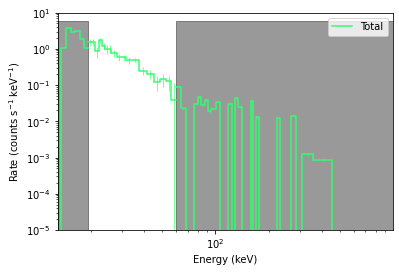

In [4]:
ogip_data.view_count_spectrum()
plt.ylim(1E-5,10)


In [5]:
fit_function = Cutoff_powerlaw()

# define the point source
point_source = PointSource('ps', 0, 0, spectral_shape=fit_function)

#define the model
model = Model(point_source)

# create a data list
datalist = DataList(ogip_data)

# make the joint likelihood
jl = JointLikelihood(model, datalist)

#fit
jl.fit();

Best fit values:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(2.3 -1.1 +2.0) x 10^-3,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,(5.4 +/- 2.5) x 10^-1,
ps.spectrum.main.Cutoff_powerlaw.xc,9.8 -1.0 +1.1,keV



Correlation matrix:



1.00,-0.94,0.47
-0.94,1.00,-0.75
0.47,-0.75,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
ogip,5.241368
total,5.241368



Values of statistical measures:



,statistical measures
AIC,18.197021
BIC,19.153850


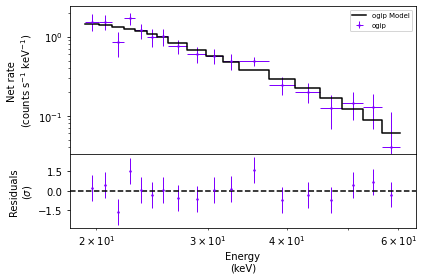

In [6]:
display_spectrum_model_counts(jl, step=True);


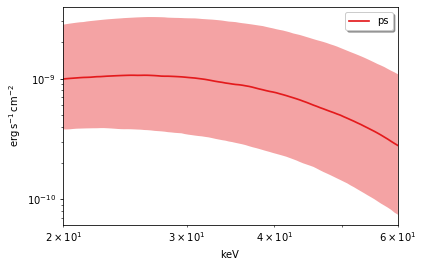

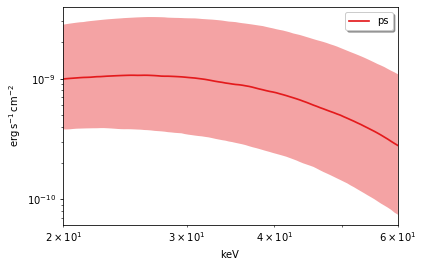

In [7]:
plot_point_source_spectra(jl.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [15]:

# A uniform prior can be defined directly, like:
model.ps.spectrum.main.Cutoff_powerlaw.index.prior = Uniform_prior(lower_bound=-2.,
                                                                     upper_bound=2.)

# or it can be set using the currently defined boundaries
model.ps.spectrum.main.Cutoff_powerlaw.xc.prior=  Uniform_prior(lower_bound=0,
                                                                     upper_bound=100)


# The same for the Log_uniform prior
model.ps.spectrum.main.Cutoff_powerlaw.K.prior = Log_uniform_prior(lower_bound=1e-3,
                                                                     upper_bound=100)


model.display()

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (3):
--------------------

                                             value min_value max_value  \
ps.spectrum.main.Cutoff_powerlaw.K      0.00227685     1e-30      1000   
ps.spectrum.main.Cutoff_powerlaw.index    0.535534       -10        10   
ps.spectrum.main.Cutoff_powerlaw.xc        9.77204     1e-99      None   

                                                  unit  
ps.spectrum.main.Cutoff_powerlaw.K      keV-1 s-1 cm-2  
ps.spectrum.main.Cutoff_powerlaw.index                  
ps.spectrum.main.Cutoff_powerlaw.xc                keV  

Fixed parameters (4):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

In [27]:
bs = BayesianAnalysis(model, datalist)

In [28]:
bs.set_sampler("multinest")
bs.sampler.setup(n_live_points=500)
bs.sample()


  analysing data from chains/fit-.txt
Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(2.7 -2.7 +3.5) x 10^-1,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,-1.0 -0.9 +1.1,
ps.spectrum.main.Cutoff_powerlaw.xc,(2.6 -1.4 +1.5) x 10,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
ogip,-2.276486
total,-2.276486



Values of statistical measures:



,statistical measures
AIC,12.267258
BIC,13.224088
DIC,-5086.387854
PDIC,-5097.895577
log(Z),-5.729999


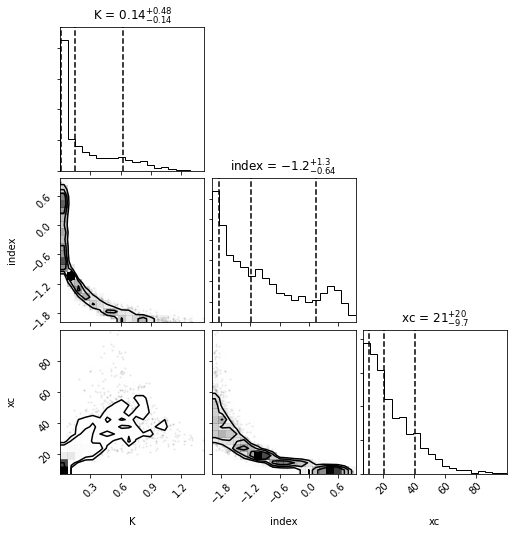

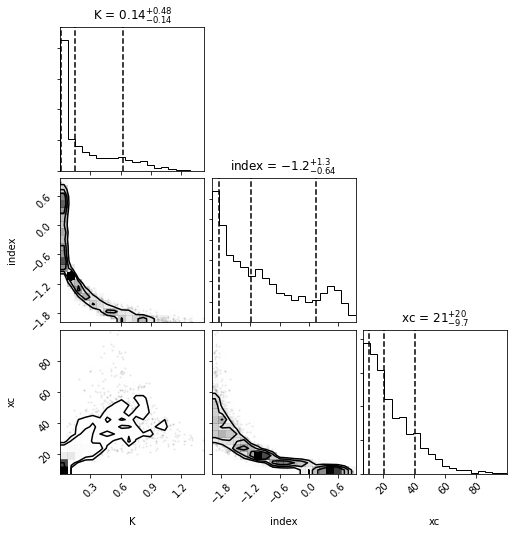

In [30]:
bs.results.corner_plot()

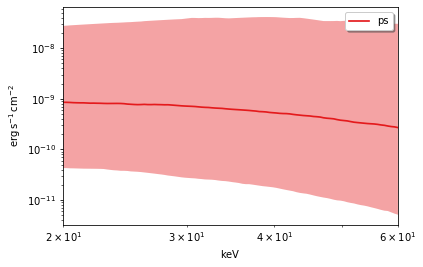

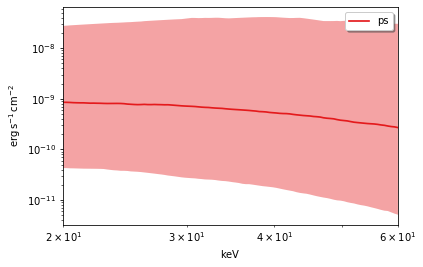

In [31]:
plot_point_source_spectra(bs.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [32]:

fluxes_bs = bs.results.get_point_source_flux(100 * u.keV, 1 * u.MeV)

,flux
ps: total,(0.015 -0.015 +5) x 10^-9 erg / (cm2 s)
